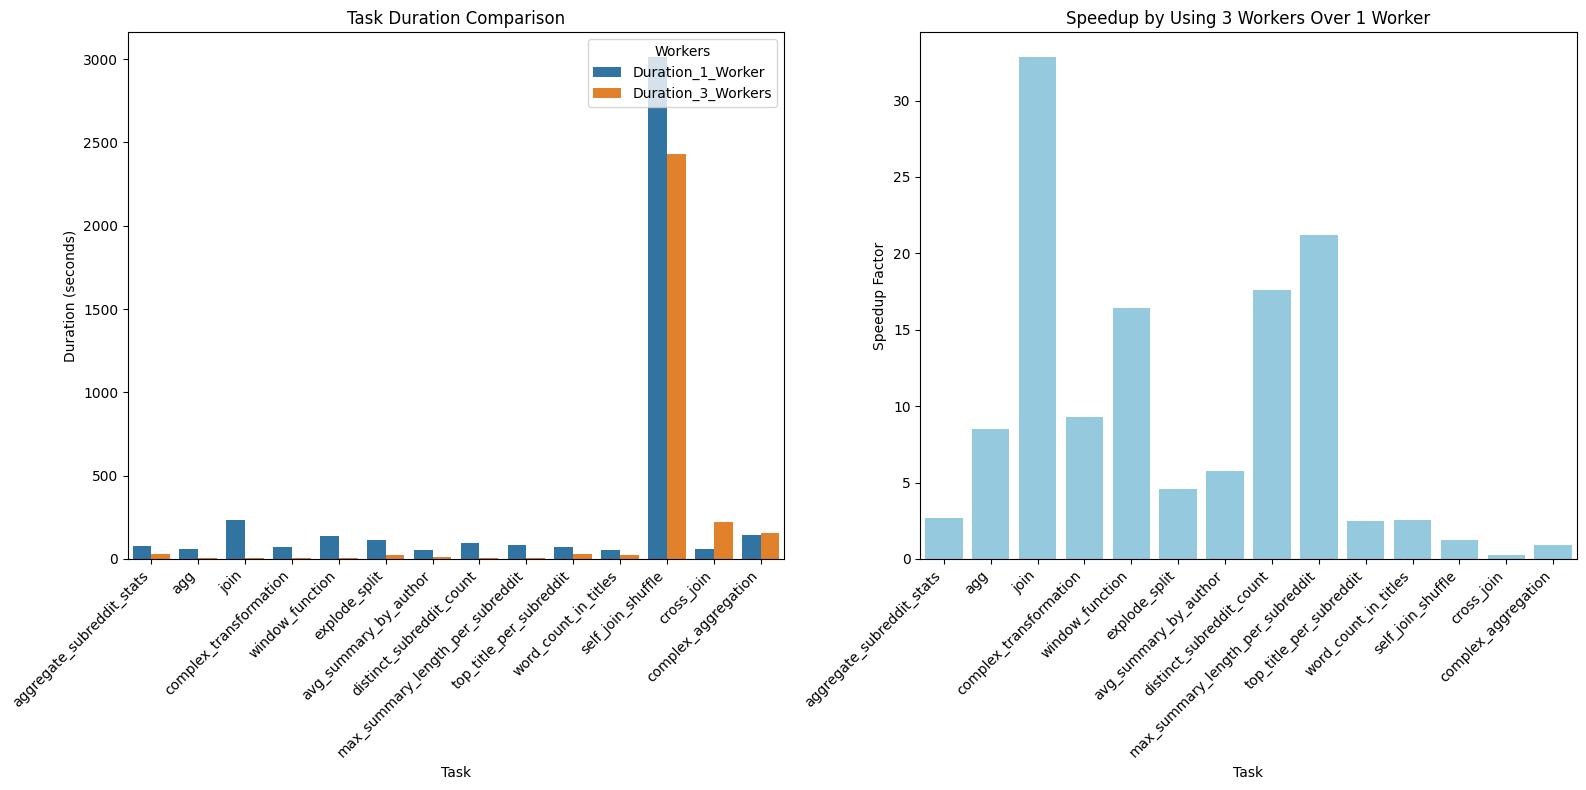

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the performance test results
df_1_worker = pd.read_csv('performance_test_1_worker.csv')
df_3_workers = pd.read_csv('performance_test_3_workers.csv')

# Rename the 'Duration' column for clarity
df_1_worker.rename(columns={'Duration': 'Duration_1_Worker'}, inplace=True)
df_3_workers.rename(columns={'Duration': 'Duration_3_Workers'}, inplace=True)

# Merge the two DataFrames on Task
df_merged = pd.merge(df_1_worker[['Task', 'Duration_1_Worker']], df_3_workers[['Task', 'Duration_3_Workers']], on='Task')

# Calculate the speedup
df_merged['Speedup'] = df_merged['Duration_1_Worker'] / df_merged['Duration_3_Workers']

# Melt the DataFrame for easier plotting with seaborn
df_melted = df_merged.melt(id_vars='Task', value_vars=['Duration_1_Worker', 'Duration_3_Workers'],
                           var_name='Number_of_Workers', value_name='Duration')

# Plotting
plt.figure(figsize=(16, 8))

# Duration comparison using seaborn
plt.subplot(1, 2, 1)
sns.barplot(x='Task', y='Duration', hue='Number_of_Workers', data=df_melted)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Duration (seconds)')
plt.title('Task Duration Comparison')
plt.legend(title='Workers', loc='upper right')

# Speedup plot
plt.subplot(1, 2, 2)
sns.barplot(x='Task', y='Speedup', data=df_merged, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Speedup Factor')
plt.title('Speedup by Using 3 Workers Over 1 Worker')

plt.tight_layout()
plt.show()
